# Demonstration of black-forest-labs/FLUX.1-dev.ipynb

### Install libraries

In [ ]:
!pip install pyngrok
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install torchsde
!pip install -U diffusers

Looking in indexes: https://download.pytorch.org/whl/cu118
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 2.7 MB/s eta 0:00:00


In [ ]:
from pyngrok import ngrok
from huggingface_hub import hf_hub_download

In [ ]:
from google.colab import userdata
NGROK_TOKEN = userdata.get("NGROK_TOKEN")
HUGGING_FACE_TOKEN = userdata.get("HUGGING_FACE_TOKEN")

In [ ]:
ngrok.set_auth_token(NGROK_TOKEN)

### Install Python 3 to use specific Comfy feature

In [ ]:
!apt-get install -y python3.8
!apt-get install python3.8-distutils
!curl https://bootstrap.pypa.io/get-pip.py -o get-pip.py
!python3.8 get-pip.py

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libpython3.8-minimal libpython3.8-stdlib mailcap mime-support python3.8-minimal
Suggested packages:
  python3.8-venv binfmt-support
The following NEW packages will be installed:
  libpython3.8-minimal libpython3.8-stdlib mailcap mime-support python3.8 python3.8-minimal
0 upgraded, 6 newly installed, 0 to remove and 49 not upgraded.
Need to get 5,103 kB of archives.
After this operation, 18.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 mailcap all 3.70+nmu1ubuntu1 [23.8 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 mime-support all 3.66 [3,696 B]
Get:3 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 libpython3.8-minimal amd64 3.8.20-1+jammy1 [796 kB]
Get:4 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 python3.8-minimal am

In [ ]:
!python3.8 --version
!pip3.8 --version

In [ ]:
!nvidia-smi

Fri Sep 27 16:51:27 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P0              47W / 400W |      2MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

# Flux1. dev

In [ ]:
from transformers import AutoModel, AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
import torch
from diffusers import FluxPipeline, DiffusionPipeline

In [ ]:
dtype = torch.bfloat16
device = "cuda" if torch.cuda.is_available() else "cpu"

pipe = DiffusionPipeline.from_pretrained(
    "black-forest-labs/FLUX.1-dev",
    token=HUGGING_FACE_TOKEN,
    torch_dtype=dtype
).to(device)

model_index.json:   0%|          | 0.00/536 [00:00<?, ?B/s]

Fetching 23 files:   0%|          | 0/23 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.53G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/273 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/782 [00:00<?, ?B/s]

(…)t_encoder_2/model.safetensors.index.json:   0%|          | 0.00/19.9k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/588 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/705 [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/20.8k [00:00<?, ?B/s]

transformer/config.json:   0%|          | 0.00/378 [00:00<?, ?B/s]

tokenizer_2/tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

(…)pytorch_model-00001-of-00003.safetensors:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

(…)pytorch_model-00002-of-00003.safetensors:   0%|          | 0.00/9.95G [00:00<?, ?B/s]

(…)pytorch_model-00003-of-00003.safetensors:   0%|          | 0.00/3.87G [00:00<?, ?B/s]

(…)ion_pytorch_model.safetensors.index.json:   0%|          | 0.00/121k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/168M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/820 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

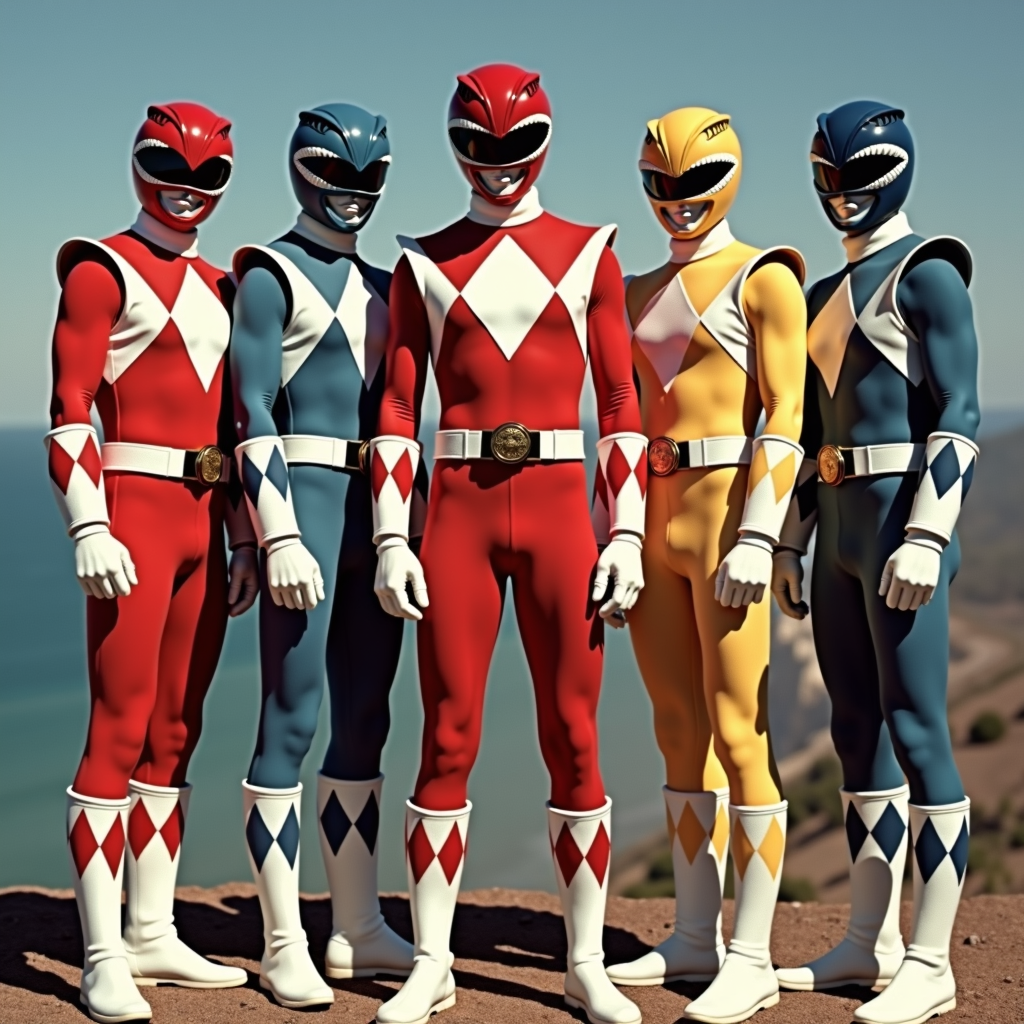

In [ ]:
image = pipe(
    prompt="Power rangers but only from 70s",
    guidance_scale=3.5,
    num_inference_steps=70,
    max_sequence_length=512
).images[0]
image